# 자기조직화지도(som)
- 대뇌피질의 시각피질의 학습 과정을 모델화한 인공신경망으로써 자율 학습에 의한 클러스터링을 수행하는 알고리즘

- SOM은 입력 데이터의 구조를 보존하면서 저차원으로 표현하며 데이터 시각화나 군집화의 용도로 사용됨.

- SOM 알고리즘은 인공신경망의 일종인 경쟁적 학습 알고리즘
    - SOM은 노드들이 주변 노드들과 유사하도록 입력 데이터를 변형시키며 학습
    - SOM은 2차원 혹은 3차원 격자 형태의 노드들로 이루어져 있으며, 각 노드는 가중치 벡터를 가지고 있음.
    - SOM은 입력 데이터와 가장 가까운 가중치 벡터를 가진 노드를 찾아 해당 노드와 주변 노드들의 가중치 벡터를 갱신하며 학습을 진행함. 
    - 이 과정에서 SOM은 입력 데이터의 분포를 반영하는 형태로 노드들을 배치

- SOM의 장점
    - 비선형 구조의 입력 데이터를 저차원 공간으로 표현가능
    - 시각화나 군집화에 유용한 데이터 표현 방법을 제공함
    - 학습 과정에서 군집화를 자연스럽게 수행가능
- SOM의 단점
    - 학습 시간이 오래 걸림
    - 초기 랜덤 배치에 따라 결과가 크게 달라질 수 있음
    - 격자 구조가 일정하지 않을 경우 데이터 분포를 제대로 반영하지 못할 수 있음

- ADP 18회 기출에 출제
    - 백화점 고객 등급 예측하는 모델 만들기
    - 데이터 : ID, 고객등급, 최종 방문 후 지난 기간, 방문 횟수, 구매가격
    - 파생변수 3개 만들고 이를 활용해 SOM을 활용한 군집분석 및 Confusion Matrix를 활용해 검증

https://untitledtblog.tistory.com/5

https://specialscene.tistory.com/87

In [27]:
import numpy as np
import pandas as pd

# iris 데이터 불러오기
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
X = iris.iloc[:, :-1].values

# SOM 모델 생성
np.random.seed(123)
n_rows, n_cols = 2, 2
n_features = X.shape[1]
weights = np.random.rand(n_rows*n_cols, n_features)
learning_rate = 0.5


In [28]:

def get_closest_neuron(sample, weights):
    distances = np.linalg.norm(sample - weights, axis=1)
    return np.argmin(distances)


In [29]:
for i in range(X.shape[0]):
    winner = get_closest_neuron(X[i], weights)
    row_winner = int(winner / n_cols)
    col_winner = winner % n_cols

    for j in range(n_rows*n_cols):
        row_j = int(j / n_cols)
        col_j = j % n_cols
        if abs(row_j - row_winner) + abs(col_j - col_winner) <= 1:
            weights[j] += learning_rate * (X[i] - weights[j])
            

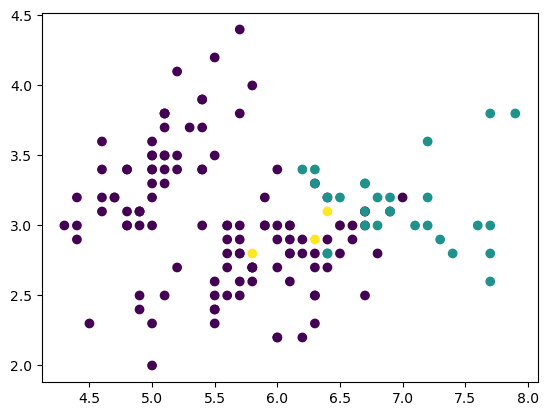

In [30]:

# SOM 모델에서 군집 번호 추출
clusters = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    clusters[i] = get_closest_neuron(X[i], weights)
clusters = clusters.astype(int) + 1  # 1~25까지 군집번호 부여

# confusion matrix 생성
y_true = iris.iloc[:, -1].values
conf_mat = pd.crosstab(y_true, clusters)

# 결과 시각화
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.show()

In [31]:
conf_mat

col_0,2,3,4
row_0,,,
Iris-setosa,50,0,0
Iris-versicolor,50,0,0
Iris-virginica,17,29,4
